In [39]:
import skimage
import numpy as np
from matplotlib import pyplot as plt 

In [40]:
image1 = skimage.io.imread('Data-2/cells/9343 AM.bmp', as_gray=True)
image2 = skimage.io.imread('Data-2/cells/10905 JL.bmp', as_gray=True)
image3 = skimage.io.imread('Data-2/cells/43590 AM.bmp', as_gray=True)

In [41]:
imageGT1 = skimage.io.imread('Data-2/cells/9343 AM Edges.bmp', as_gray=True)
imageGT2 = skimage.io.imread('Data-2/cells/10905 JL Edges.bmp', as_gray=True)
imageGT3 = skimage.io.imread('Data-2/cells/43590 AM Edges.bmp', as_gray=True)

def roc(filtered, groundTruth):
    groundTruth = np.logical_not(groundTruth/255)

    TP = np.sum((filtered == 1) & (groundTruth == 1))
    FP = np.sum((filtered == 1) & (groundTruth == 0))
    TN = np.sum((filtered == 0) & (groundTruth == 0))
    FN = np.sum((filtered == 0) & (groundTruth == 1))

    # Compute TPR and FPR
    tpr = TP / (TP + FN) if (TP + FN) != 0 else 0
    fpr = FP / (FP + TN) if (FP + TN) != 0 else 0

    # formatted_tpr = "{:.4f}".format(tpr)
    # formatted_fpr = "{:.4f}".format(fpr)
    formatted_tpr = round(tpr, 4)
    formatted_fpr = round(fpr, 4)


    print(f'Sobel: TPR {formatted_tpr} FPR {1-formatted_fpr}')

    

In [42]:
def canny_edge_detector(image, sigma=1):
    # Apply Canny edge detection
    edges = skimage.feature.canny(image, sigma=sigma)

    return edges

In [43]:
edges_image1 = canny_edge_detector(image1)
edges_image2 = canny_edge_detector(image2)
edges_image3 = canny_edge_detector(image3)

th_1 = skimage.filters.threshold_otsu(edges_image1)
th_2 = skimage.filters.threshold_otsu(edges_image2)
th_3 = skimage.filters.threshold_otsu(edges_image3)

print(th_1)
print(th_2)
print(th_3)

thresholded_1 = edges_image1 > th_1
thresholded_2 = edges_image2 > th_2
thresholded_3 = edges_image3 > th_3

roc(thresholded_1, imageGT1)
roc(thresholded_2, imageGT2)
roc(thresholded_3, imageGT3)

0.001953125
0.001953125
0.001953125
Sobel: TPR 0.3089 FPR 0.9651
Sobel: TPR 0.3503 FPR 0.9875
Sobel: TPR 0.0781 FPR 0.9944


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skimage/exposure/exposure.py:300: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bin_edges = np.histogram(image, bins=bins, range=hist_range)


(-0.5, 1279.5, 1023.5, -0.5)

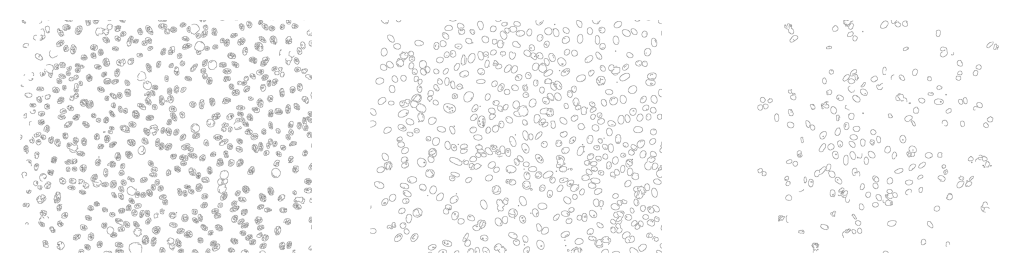

In [44]:
plt.figure(dpi=200)

plt.subplot(1,3,1)
plt.imshow(edges_image1, cmap='binary')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(edges_image2, cmap='binary')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(edges_image3, cmap='binary')
plt.axis('off')
